<a href="https://colab.research.google.com/github/ppza53893/CLIPasso/blob/main/CLIPasso_fix_errors.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# git clone, pip install


In [1]:
!git clone https://github.com/yael-vinker/CLIPasso.git
!git clone https://github.com/BachiLi/diffvg
!pip install svgwrite svgpathtools cssutils torch-tools visdom imageio-ffmpeg torchfile wandb ftfy

# https://stackoverflow.com/questions/55965507
!pip install imageio==2.4.1

Cloning into 'CLIPasso'...
remote: Enumerating objects: 390, done.
remote: Counting objects: 100% (68/68), done.
remote: Compressing objects: 100% (13/13), done.
remote: Total 390 (delta 58), reused 55 (delta 55), pack-reused 322
Receiving objects: 100% (390/390), 12.90 MiB | 30.02 MiB/s, done.
Resolving deltas: 100% (197/197), done.
Cloning into 'diffvg'...
remote: Enumerating objects: 279, done.
remote: Total 279 (delta 0), reused 0 (delta 0), pack-reused 279
Receiving objects: 100% (279/279), 10.27 MiB | 18.91 MiB/s, done.
Resolving deltas: 100% (105/105), done.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 67 kB 2.1 MB/s 
     |████████████████████████████████| 67 kB 3.1 MB/s 
     |████████████████████████████████| 399 kB 35.0 MB/s 
     |████████████████████████████████| 43 kB 612 kB/s 
     |████████████████████████████████| 1.4 MB 68.5 MB/s 
     |████████████████████████████████| 26.9 

# Build diffvg without tensorflow

In [ ]:
%cd /content/diffvg
!git submodule update --init --recursive

# disable build against tensorflow
with open('CMakeLists.txt', 'r') as f:
    cmake_lists = f.read()
with open('CMakeLists.txt', 'w') as f:
    f.write(
        cmake_lists
        .replace("find_package(TensorFlow)", "# find_package(TensorFlow)")
        .replace("if(TensorFlow_FOUND)", "if(0)")
    )

!python setup.py install

%cd ..

/content/diffvg
Submodule 'pybind11' (https://github.com/pybind/pybind11.git) registered for path 'pybind11'
Submodule 'thrust' (https://github.com/thrust/thrust.git) registered for path 'thrust'
Cloning into '/content/diffvg/pybind11'...
Cloning into '/content/diffvg/thrust'...
Submodule path 'pybind11': checked out '72b06b86b3824781f31c790dfce67e26e6307816'
Submodule 'tools/clang' (https://github.com/wjakob/clang-cindex-python3.git) registered for path 'pybind11/tools/clang'
Cloning into '/content/diffvg/pybind11/tools/clang'...
Submodule path 'pybind11/tools/clang': checked out '6a00cbc4a9b8e68b71caf7f774b3f9c753ae84d5'
Submodule path 'thrust': checked out 'ff00c813aa3a6bbfd1d8c338313f382b6b340005'
Submodule 'cub' (https://github.com/thrust/cub.git) registered for path 'thrust/dependencies/cub'
Cloning into '/content/diffvg/thrust/dependencies/cub'...
Submodule path 'thrust/dependencies/cub': checked out '2442f44532ffcc53298c7e3a298feb5134563860'
running install
running bdist_egg
ru

# Modify CLIPasso

In [ ]:
%cd /content/CLIPasso
!git pull

with open('/content//CLIPasso/CLIP_/clip/auxilary.py', 'r') as f:
    old_code = f.read()
with open('/content/CLIPasso/CLIP_/clip/auxilary.py', 'w') as f:
    f.write(
        old_code.replace('pad = F._pad', 'pad = F.pad')
    )
with open('/content/CLIPasso/display_results.py', 'r') as f:
    old_code = f.read()
with open('/content/CLIPasso/display_results.py', 'w') as f:
    f.write(
        old_code
        .replace("sketches.append(sketch)", "sketches.append(np.asarray(sketch))")
    )

/content/CLIPasso
Already up to date.


# Download U2Net model

In [ ]:
!wget https://huggingface.co/akhaliq/CLIPasso/resolve/main/u2net.pth -O ./U2Net_/saved_models/u2net.pth

--2022-12-10 02:11:25--  https://huggingface.co/akhaliq/CLIPasso/resolve/main/u2net.pth
Resolving huggingface.co (huggingface.co)... 3.234.187.147, 54.147.99.175, 2600:1f18:147f:e800:3df1:c2fc:20aa:9b45, ...
Connecting to huggingface.co (huggingface.co)|3.234.187.147|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://cdn-lfs.huggingface.co/akhaliq/CLIPasso/10025a17f49cd3208afc342b589890e402ee63123d6f2d289a4a0903695cce58?response-content-disposition=attachment%3B%20filename%3D%22u2net.pth%22&Expires=1670897487&Policy=eyJTdGF0ZW1lbnQiOlt7IlJlc291cmNlIjoiaHR0cHM6Ly9jZG4tbGZzLmh1Z2dpbmdmYWNlLmNvL2FraGFsaXEvQ0xJUGFzc28vMTAwMjVhMTdmNDljZDMyMDhhZmMzNDJiNTg5ODkwZTQwMmVlNjMxMjNkNmYyZDI4OWE0YTA5MDM2OTVjY2U1OD9yZXNwb25zZS1jb250ZW50LWRpc3Bvc2l0aW9uPWF0dGFjaG1lbnQlM0IlMjBmaWxlbmFtZSUzRCUyMnUybmV0LnB0aCUyMiIsIkNvbmRpdGlvbiI6eyJEYXRlTGVzc1RoYW4iOnsiQVdTOkVwb2NoVGltZSI6MTY3MDg5NzQ4N319fV19&Signature=pR2WAy03bN0cYkqPJ3~1IVRyIWeud55Wnu~vU5e0wiXDMihvp0bCm8FNSAfAnb1Gioz

# Run

In [ ]:
#@title Upload image
import shutil
from google.colab import files
data = files.upload()

target_image = list(data.keys())[0]
shutil.move(target_image, './target_images/')

Saving FYcVYBDUIAAJp3U.jpg to FYcVYBDUIAAJp3U.jpg


'./target_images/FYcVYBDUIAAJp3U.jpg'

Processing [FYcVYBDUIAAJp3U.jpg] ...


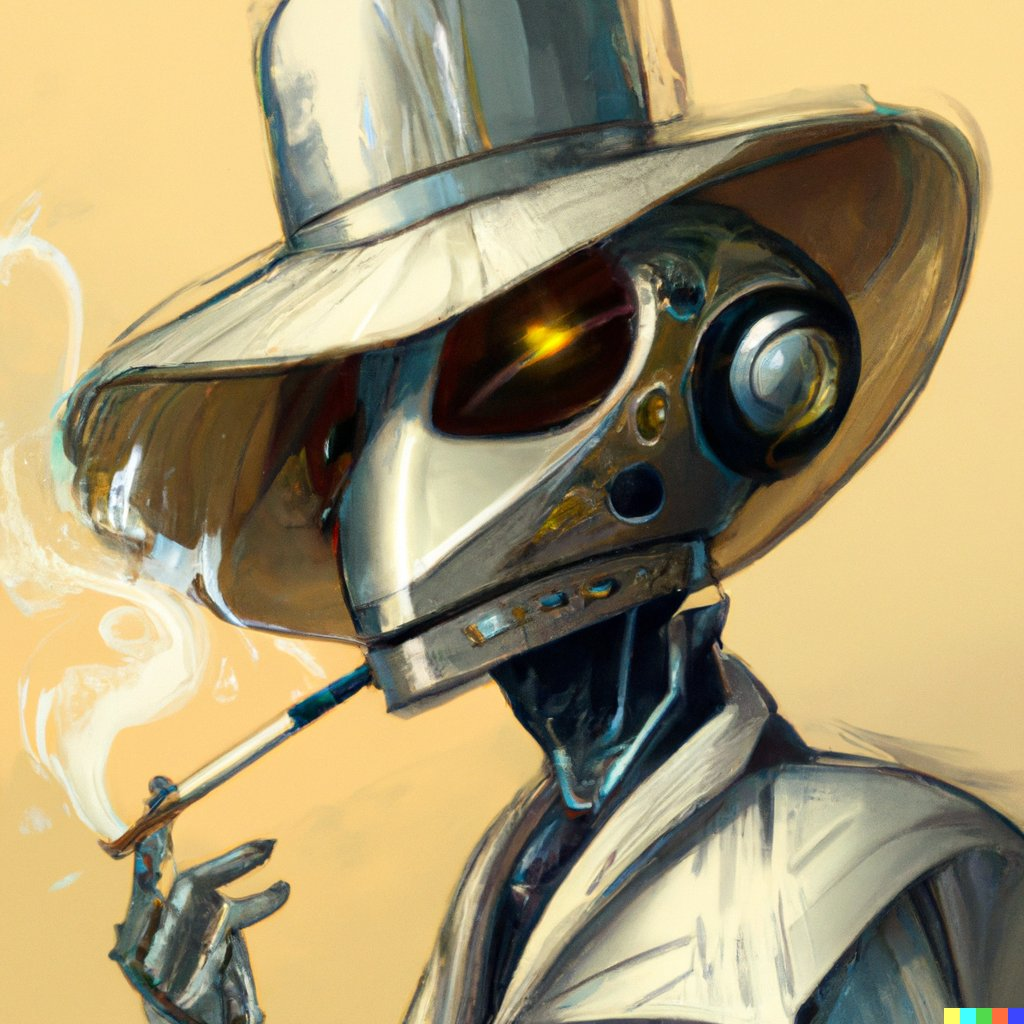

GPU: True, 0
Results will be saved to 
[/content/CLIPasso/output_sketches/FYcVYBDUIAAJp3U/] ...


In [ ]:
#@title Run

mask_object = 0 #@param {"type": "integer"}
fix_scale = 0 #@param {"type": "integer"}
num_strokes = 64 #@param {"type": "integer"}

%run run_object_sketching.py --target_file $target_image --num_sketches 3 -colab --mask_object $mask_object --fix_scale $fix_scale --num_strokes $num_strokes

/content/CLIPasso


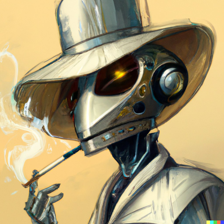

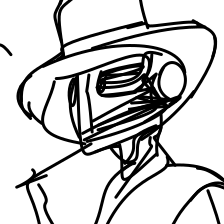

You can download the result sketch from /content/CLIPasso/output_sketches/FYcVYBDUIAAJp3U/FYcVYBDUIAAJp3U_64strokes_seed2000/final_sketch.png
/content/CLIPasso/output_sketches/FYcVYBDUIAAJp3U/FYcVYBDUIAAJp3U_64strokes_seed2000


In [ ]:
#@title display image
%cd /content/CLIPasso
%run display_results.py --target_file FYcVYBDUIAAJp3U.jpg --num_strokes $num_strokes

In [ ]:
#@title If you get an import error above, run this cell and try again.

# fix pydiffvg import path.
import re
import sys
import os
import itertools
from itertools import filterfalse

use_path = None
found_diffvg = False
for import_path in sys.path:
  if re.fullmatch(r"/usr/local/lib/python[\d\.]*/dist-packages", import_path):
    for p in filterfalse(
        lambda x: not x.startswith('d'), os.listdir(import_path)
      ):
      if p[:6] == "diffvg":
        use_path = os.path.join(import_path, p)
        found_diffvg = True
        break
    else:
      continue
  if found_diffvg:
    break
if not found_diffvg:
  raise Exception(
      "Could not find diffvg package. try re-build diffvg.\n\n"
      "If you add the path manually, "
      "you can add the path of the lines starting with \"Installed\" "
      "in the diffvg build log to `sys.path` to make it work."
  )
else:
  if use_path not in sys.path:
    sys.path.append(use_path)
    print("Added path:", use_path)

Added path: /usr/local/lib/python3.8/dist-packages/diffvg-0.0.1-py3.8-linux-x86_64.egg


In [ ]:
#@title gif to mp4

import re
import os
import subprocess as sp
import moviepy.editor as mvp
from IPython.display import clear_output

abs_path = os.path.abspath(os.getcwd())
result_path = f"{abs_path}/output_sketches/{os.path.splitext(target_image)[0]}"
svg_files = os.listdir(result_path)
svg_files = [f for f in svg_files if "best.svg" in f]

p = re.compile("_best")
best_sketch_dir = ""
for m in p.finditer(svg_files[0]):
    best_sketch_dir += svg_files[0][0: m.start()]

cur_path = f"{abs_path}/output_sketches/{os.path.splitext(target_image)[0]}/{best_sketch_dir}"
sp.run(["ffmpeg", "-y", "-framerate", "10", "-pattern_type", "glob", "-i", 
            f"{cur_path}/svg_to_png/iter_*.png", "-vb", "20M", f"{cur_path}/sketch.mp4"])

sp.run(["ffmpeg", "-y", "-i", f"{cur_path}/sketch.mp4", "-filter_complex",
    "[0]trim=0:2[hold];[0][hold]concat[extended];[extended][0]overlay",
    f"{cur_path}/sketch_longer.mp4"])

clear_output()
display(mvp.ipython_display(f"{cur_path}/sketch_longer.mp4"))